SAN FRANCISCO EMPLOYEE SALARY ANALYSIS (2011–2018)

This project takes a closer look at public employee salaries in San Francisco over an eight-year period. It examines patterns in base pay, overtime, and benefits to better understand compensation trends, highlights the highest-paying job roles, and even uses machine learning to help predict total pay based on various factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# =======<<<<<< Load and Prepare Dataset >>>>>>=======
df = pd.read_csv("Total.csv")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Fill missing values with 0
df.fillna(0, inplace=True)


C:\Users\kalya\AppData\Local\Temp\ipykernel_31904\1273086285.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Total.csv")


In [3]:
# =======<<<<<< Data Type Conversion and Correction >>>>>>=======
# Convert relevant columns to numeric
columns_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Fix Total Pay if calculation is wrong
df['Calculated Total'] = df['BasePay'] + df['OvertimePay'] + df['OtherPay']
df['TotalPay'] = df[['TotalPay', 'Calculated Total']].max(axis=1)
df.drop('Calculated Total', axis=1, inplace=True)



In [4]:
# =======<<<<<< Descriptive Statistics >>>>>>=======
print("Summary Statistics:")
print(df[columns_to_convert].describe())


Summary Statistics:
             BasePay    OvertimePay       OtherPay       Benefits  \
count  312882.000000  312882.000000  312882.000000  312882.000000   
mean    69673.050600    5668.911274    3460.683913   22125.693989   
std     45436.746729   12745.638970    7387.253906   16289.184099   
min      -474.400000    -292.800000   -7058.590000  -13939.420000   
25%     35342.125000       0.000000       0.000000    2079.272500   
50%     67645.970000       0.000000     728.000000   26771.565000   
75%     99236.202500    5223.115000    3958.680000   34288.847500   
max    592394.340000  309481.030000  400184.250000  125891.730000   

            TotalPay  
count  312882.000000  
mean    78802.645788  
std     53230.758542  
min      -618.130000  
25%     38803.000000  
50%     74908.790000  
75%    111386.897500  
max    592394.340000  


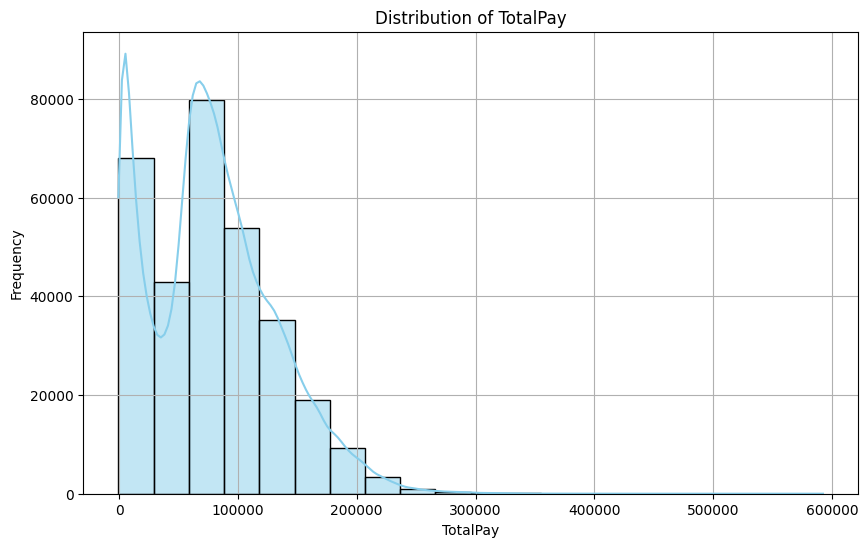

In [5]:
# Distribution of TotalPay
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of TotalPay")
plt.xlabel("TotalPay")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


C:\Users\kalya\AppData\Local\Temp\ipykernel_31904\3266486860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees, x='EmployeeName', y='TotalPay', palette='viridis')


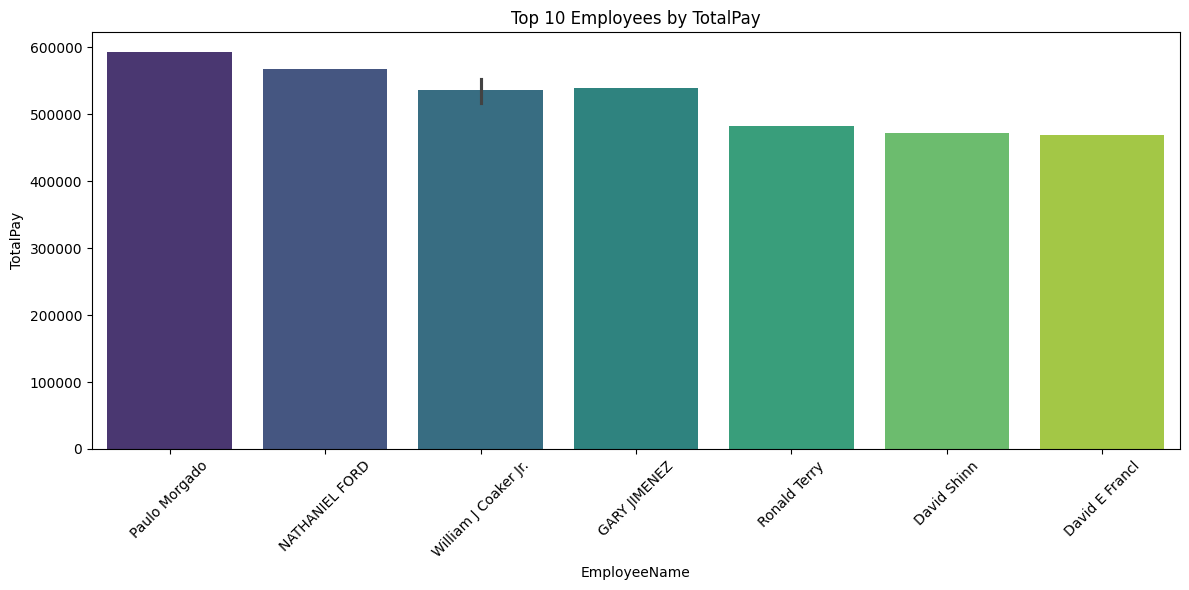

In [6]:
# Top 10 Employees by TotalPay
plt.figure(figsize=(12, 6))
top_employees = df.sort_values(by='TotalPay', ascending=False).head(10)
sns.barplot(data=top_employees, x='EmployeeName', y='TotalPay', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Employees by TotalPay")
plt.xlabel("EmployeeName")
plt.ylabel("TotalPay")
plt.tight_layout()
plt.show()


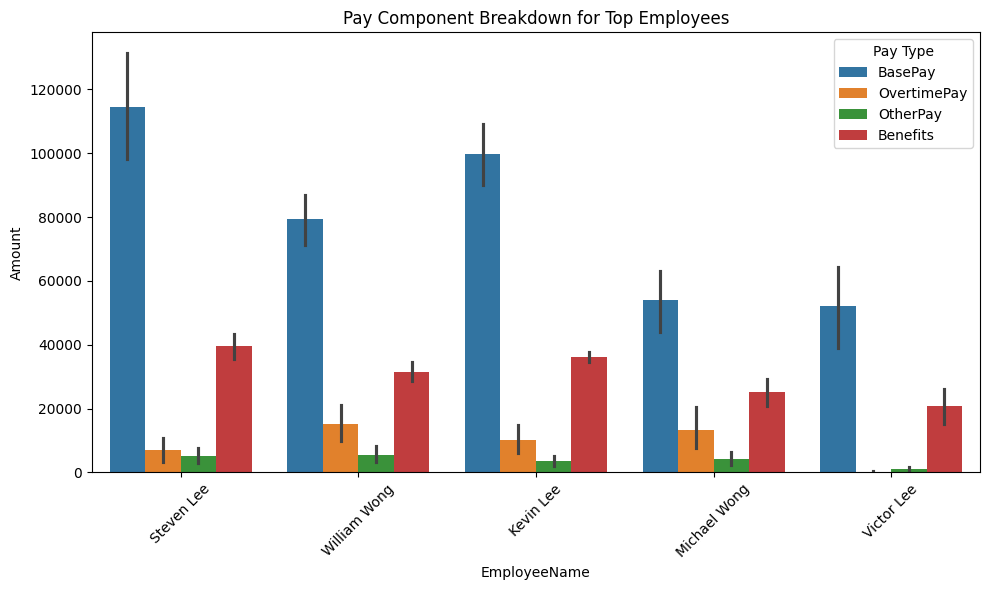

In [7]:
# Breakdown of Pay Components for Top Employees
plt.figure(figsize=(10, 6))
df_melt = df.melt(id_vars='EmployeeName', value_vars=['BasePay', 'OvertimePay', 'OtherPay', 'Benefits'],
                  var_name='Pay Type', value_name='Amount')
top_names = df['EmployeeName'].value_counts().head(5).index
sns.barplot(data=df_melt[df_melt['EmployeeName'].isin(top_names)], x='EmployeeName', y='Amount', hue='Pay Type')
plt.title("Pay Component Breakdown for Top Employees")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()